# Matplotlib 可视化基础

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from abupy import ABuSymbolPd

In [3]:
tsla_df = ABuSymbolPd.make_kl_df('usTSLA', n_folds=2)
tsla_df.tail()

,close,high,low,p_change,open,pre_close,volume,date,date_week,key,atr21,atr14
2018-11-14,344.25,347.00,337.16,1.630,342.97,338.73,203499,20181114,2,498,17.9357,16.8315
2018-11-15,348.44,348.58,339.04,1.217,342.33,344.25,4625719,20181115,3,499,17.2007,15.9006
2018-11-16,354.31,355.70,345.12,1.685,345.19,348.44,7206191,20181116,4,500,16.6779,15.3072
2018-11-19,358.88,360.93,356.59,1.290,356.65,354.31,24366,20181119,0,501,16.2972,14.9316
2018-11-20,347.17,349.42,333.65,-3.263,342.85,358.88,347350,20181120,1,502,16.6938,15.6954


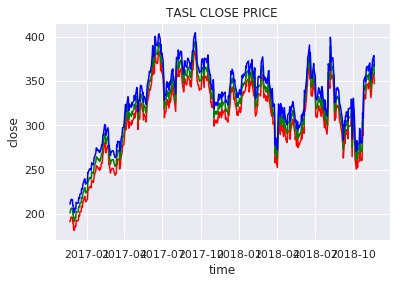

In [10]:
def plot_demo(axs=None, just_series = False):
    """
    绘制tsla的收盘价曲线
    axs 为子画布
    """
    # 如果传入画布，则使用画布
    drawer = plt if axs is None else axs
    drawer.plot(tsla_df.close, c='r')
    if not just_series:
        # 曲线不重叠， 绿色
        drawer.plot(tsla_df.close.index, tsla_df.close.values + 10, c='g')
        drawer.plot(tsla_df.close.index.tolist(), (tsla_df.close.values + 20).tolist(), c='b')
    plt.xlabel('time')
    plt.ylabel('close')
    plt.title('TASL CLOSE PRICE')
    plt.grid(True)
    
plot_demo()

## matplotlib 字画布及loc的使用

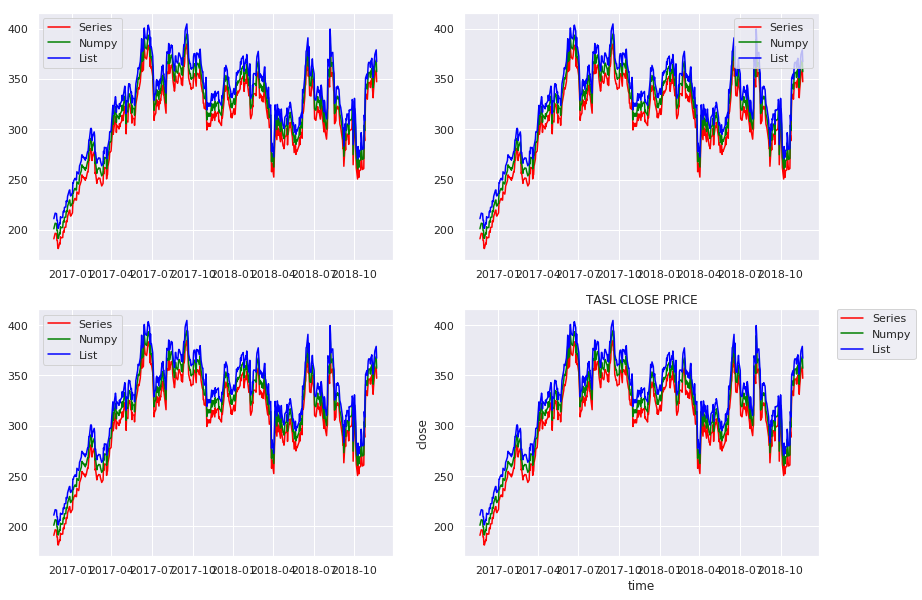

In [17]:
_,axs = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
# 画布0
drawer = axs[0][0]
plot_demo(drawer)
drawer.legend(['Series', 'Numpy', 'List'], loc=0)

# 画布1
drawer = axs[0][1]
plot_demo(drawer)
drawer.legend(['Series', 'Numpy', 'List'], loc=1)

# 画布2
drawer = axs[1][0]
plot_demo(drawer)
drawer.legend(['Series', 'Numpy', 'List'], loc=2)

# 画布3
drawer = axs[1][1]
plot_demo(drawer)
drawer.legend(['Series', 'Numpy', 'List'], bbox_to_anchor=(1.05, 1), loc=2, 
                borderaxespad=0)


## K线绘制

In [25]:
#import matplotlib.finance as mpf
import talib
import numpy as np
import matplotlib.pyplot as plt
# import matplotlib.finance as mpf
import mpl_finance as mpf
import matplotlib.dates as mdates
%matplotlib inline

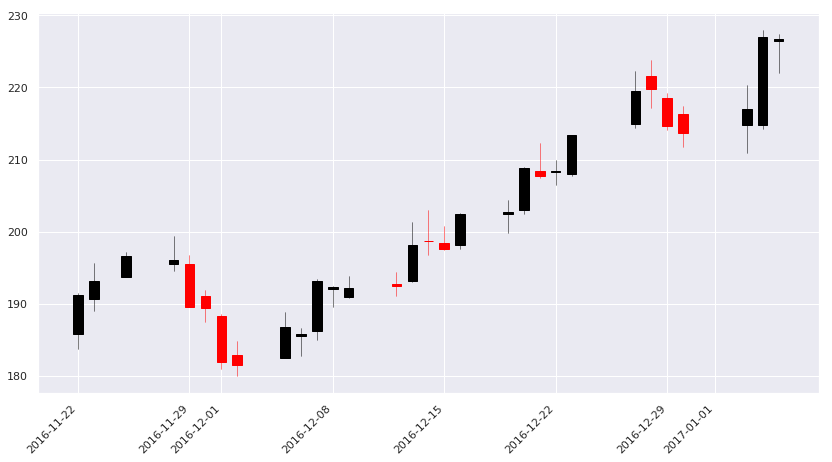

In [40]:
"""
matplotlib.finance.candlestick2_ochl(ax, opens, closes, highs, lows, width=4, colorup='k', colordown='r', alpha=0.75)  
matplotlib.finance.candlestick2_ohlc(ax, opens, highs, lows, closes, width=4, colorup='k', colordown='r', alpha=0.75)  +
matplotlib.finance.candlestick_ochl(ax, quotes, width=0.2, colorup='k', colordown='r', alpha=1.0)  
matplotlib.finance.candlestick_ohlc(ax, quotes, width=0.2, colorup='k', colordown='r', alpha=1.0)¶

"""
__colorup__ = 'red'
__colordown__ = 'green'

tsla_part_df = tsla_df[:30]
fig,ax = plt.subplots(figsize=(14,7))
qutotes = []
for index, (d,o,c,h,l) in enumerate(zip(tsla_part_df.index, 
                                        tsla_part_df.open,
                                        tsla_part_df.close,
                                        tsla_part_df.high,
                                        tsla_part_df.low
                                       )):
    d = mdates.date2num(d)
    val = (d,o,c,h,l)
    qutotes.append(val)

mpf.candlestick_ohlc(ax, zip(mdates.date2num(tsla_part_df.index), tsla_part_df.open, tsla_part_df.high,tsla_part_df.low,tsla_part_df.close), width=0.6)
ax.xaxis_date()
ax.autoscale_view()
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()


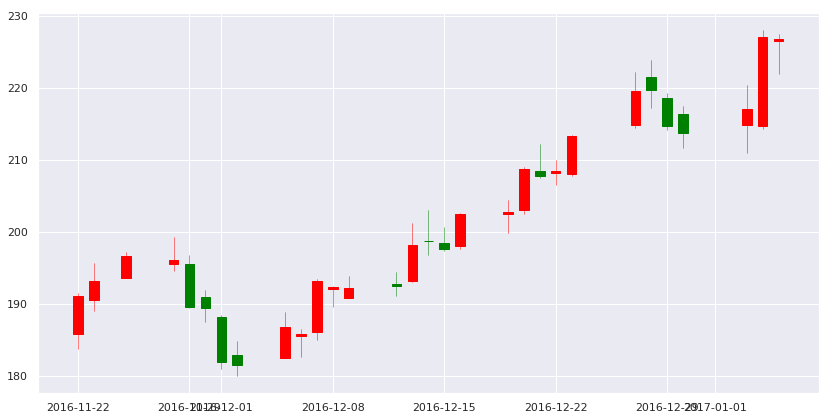

In [42]:
fig,ax = plt.subplots(figsize=(14,7))
mpf.candlestick_ochl(ax, qutotes, width=0.6, colorup=__colorup__, colordown= __colordown__)
ax.autoscale_view()
ax.xaxis_date()

## 使用Bokeh 交互可视化

> `Bokeh` 针对web浏览器实现交互式可视化Python库

In [44]:
from abupy import ABuMarketDrawing
ABuMarketDrawing.plot_candle_form_klpd(tsla_df, html_bk=True)

## 使用`pandas`可视化数据

In [47]:
import pandas as pd

In [49]:
demo_list = np.array([2,4,16,20])
demo_window = 3
pd.rolling_std(demo_list, window=demo_window, center=False) * np.sqrt(demo_window)

/Users/cuijl/.pyenv/versions/3.6.0/envs/rqalpha_3.6.0/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_std is deprecated for ndarrays and will be removed in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


array([    nan,     nan, 13.1149, 14.4222])

/Users/cuijl/.pyenv/versions/3.6.0/envs/rqalpha_3.6.0/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).std()
  
/Users/cuijl/.pyenv/versions/3.6.0/envs/rqalpha_3.6.0/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: pd.ewm_std is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=20,min_periods=20,adjust=True,ignore_na=False).std(bias=False)
  if __name__ == '__main__':


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1295346d8>,
      dtype=object)

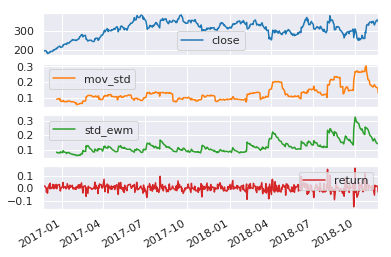

In [50]:
tsla_df_copy = tsla_df.copy()
# 投资回报
tsla_df_copy['return'] = np.log(tsla_df['close'] / tsla_df['close'].shift(1))

# 移动收益标准差
tsla_df_copy['mov_std'] = pd.rolling_std(tsla_df_copy['return'], window=20, center=False) * np.sqrt(20) 

# 加权移动收益标准差
tsla_df_copy['std_ewm'] = pd.ewmstd(tsla_df_copy['return'], span=20, min_periods=20, adjust=True) * np.sqrt(20)

tsla_df_copy[['close', 'mov_std', 'std_ewm', 'return']].plot(subplots=True, grid=True)


## 绘制股票的价格与均线

/Users/cuijl/.pyenv/versions/3.6.0/envs/rqalpha_3.6.0/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=30,center=False).mean()
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/cuijl/.pyenv/versions/3.6.0/envs/rqalpha_3.6.0/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=60,center=False).mean()
  after removing the cwd from sys.path.
/Users/cuijl/.pyenv/versions/3.6.0/envs/rqalpha_3.6.0/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=90,center=False).mean()
  """


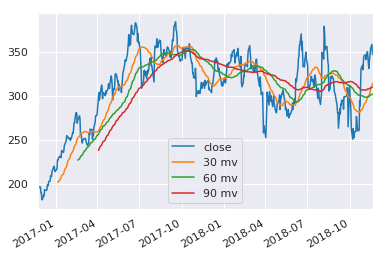

In [54]:
tsla_df.close.plot()
# 计算移动均线
pd.rolling_mean(tsla_df.close, window=30).plot()
pd.rolling_mean(tsla_df.close, window=60).plot()
pd.rolling_mean(tsla_df.close, window=90).plot()
plt.legend(['close', '30 mv', '60 mv', '90 mv'], loc='best')

### 统计图形种类

* `line`: 绘制曲线
* `bar`: 柱状图形
* `barh`: 横向柱状图
* `hist`: 直方图
* `kde`: 概率密度曲线
* `density`: 通kde
* `pie`: 绘制图饼

In [82]:
# 过滤 低开高收的下一个交易日
tsla_df[ (tsla_df.close > tsla_df.open) & 
                                     (tsla_df.key != tsla_df.shape[0] -1)
                                     ].key.values  + 1

array([  1,   2,   3,   4,   9,  10,  11,  12,  13,  15,  18,  19,  20,
        22,  23,  24,  28,  29,  30,  31,  32,  34,  35,  36,  38,  41,
        42,  45,  47,  49,  51,  53,  54,  56,  57,  60,  61,  64,  66,
        68,  69,  70,  75,  76,  80,  82,  84,  85,  86,  90,  91,  93,
        94,  95,  98, 100, 101, 103, 105, 108, 109, 113, 115, 116, 122,
       126, 127, 128, 129, 130, 132, 133, 134, 135, 136, 138, 139, 141,
       145, 146, 147, 150, 157, 158, 161, 163, 165, 167, 169, 175, 176,
       178, 179, 181, 188, 189, 190, 193, 194, 195, 199, 201, 203, 204,
       205, 206, 208, 217, 218, 220, 222, 223, 224, 227, 228, 235, 236,
       237, 240, 242, 244, 245, 246, 248, 252, 254, 255, 256, 258, 259,
       261, 262, 264, 265, 266, 269, 273, 277, 279, 281, 283, 285, 286,
       288, 289, 291, 292, 296, 297, 298, 299, 303, 304, 308, 309, 310,
       311, 312, 314, 315, 316, 320, 321, 323, 325, 326, 333, 339, 342,
       343, 346, 347, 352, 353, 358, 359, 360, 361, 362, 363, 36

In [89]:
# 收盘价格大于开盘价，且不是数据中的最后一个交易日。

"""
收盘价格大于开盘价
不是数据中的最后一个交易日
"""
low_to_high_df = tsla_df.iloc[tsla_df[ (tsla_df.close > tsla_df.open) & 
                                     (tsla_df.key != tsla_df.shape[0] -1)
                                     ].key.values +1]

# 通过where将下一个交易日的涨跌幅通过ceil和floor向上及向下取整。
# np.ceil() 向上取整数
# np.floor 向下取整
change_ceil_floor = np.where(low_to_high_df['p_change'] > 0, 
                             np.ceil(low_to_high_df['p_change']), np.floor(low_to_high_df['p_change']))

change_ceil_floor = pd.Series(change_ceil_floor)

# 显示 change_ceil_floor 前5
change_ceil_floor.head()

0    2.0
1    2.0
2   -1.0
3   -4.0
4   -1.0
dtype: float64

In [90]:
change_ceil_floor[change_ceil_floor < 0].sum()

-272.0

In [91]:
change_ceil_floor[change_ceil_floor > 0].sum()

327.0

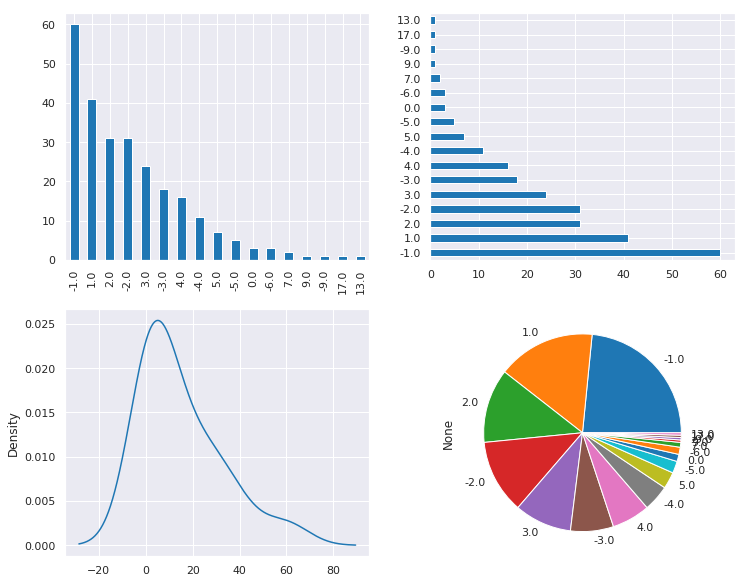

In [92]:
# 2*2 , 4张子图
_, axs = plt.subplots(nrows=2, ncols=2, figsize=(12,10))
# 垂直柱状图
change_ceil_floor.value_counts().plot(kind='bar', ax=axs[0][0])

# 水平柱状图
change_ceil_floor.value_counts().plot(kind='barh', ax=axs[0][1])

# 概率密度图
change_ceil_floor.value_counts().plot(kind='kde', ax=axs[1][0])

# 圆饼图
change_ceil_floor.value_counts().plot(kind='pie', ax=axs[1][1])




## 使用Seaborn 可视化数据

In [93]:
import seaborn as sns

/Users/cuijl/.pyenv/versions/3.6.0/envs/rqalpha_3.6.0/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


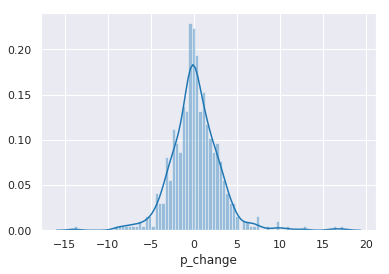

In [95]:
# 直方图，概率密度图 叠加
sns.distplot(tsla_df['p_change'], bins=80)

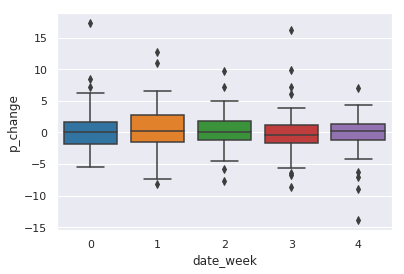

In [97]:
# 绘制箱体图
# 使用列名称，绘制箱体图， date_week - >x, p_change -> y
sns.boxplot(x='date_week', y='p_change', data = tsla_df)

/Users/cuijl/.pyenv/versions/3.6.0/envs/rqalpha_3.6.0/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


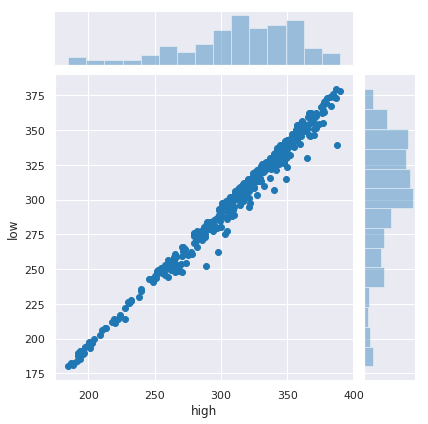

In [98]:
# 可视化数据的相关性， 概率目睹分布
sns.jointplot(tsla_df['high'], tsla_df['low'])

In [101]:
from abupy import  ABuSymbolPd

In [108]:
# 热力图
change_df = pd.DataFrame({'tsla': tsla_df.p_change})
change_df = change_df.join(pd.DataFrame({'goog': ABuSymbolPd.make_kl_df(
    'usGOOG', n_folds =2).p_change}), how='outer')
change_df = change_df.join(pd.DataFrame({'aapl': ABuSymbolPd.make_kl_df(
    'usAAPL', n_folds=2).p_change}), how='outer')

change_df = change_df.join(pd.DataFrame({'fb': ABuSymbolPd.make_kl_df(
    'usFB', n_folds=2).p_change}), how='outer')

change_df = change_df.join(pd.DataFrame({'bidu': ABuSymbolPd.make_kl_df(
    'usBIDU', n_folds=2).p_change}), how='outer')

# 滤除缺失数据
change_df = change_df.dropna()

# 多组股票的涨跌幅数据结果
change_df.head()

,tsla,goog,aapl,fb,bidu
2016-11-22,3.604,-0.121,0.063,-0.246,-0.736
2016-11-23,1.030,-0.948,-0.510,-0.519,-0.511
2016-11-25,1.817,0.091,0.503,-0.381,0.495
2016-11-28,-0.270,0.861,-0.197,0.025,1.557
2016-11-29,-3.340,0.338,-0.099,0.382,1.305


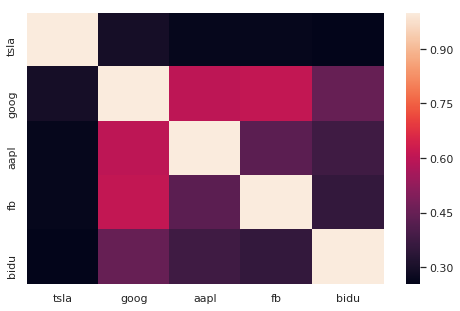

In [109]:
# 使用corr计算数据的相关性 ， 
# 协方差
corr = change_df.corr()
_,ax = plt.subplots(figsize=(8,5))

sns.heatmap(corr, ax=ax)


## 实例1： 可视化量化策略的交易区间及卖出原因

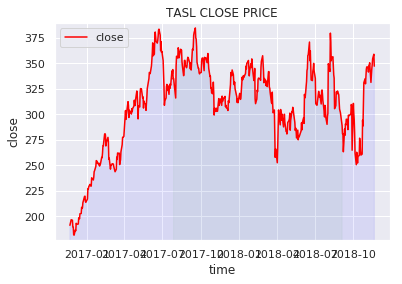

In [120]:
"""
1. 表明操作区间
"""
def plot_trade(buy_date, sell_date):
    start = tsla_df[tsla_df.index == buy_date].key.values[0]
    end = tsla_df[tsla_df.index == sell_date].key.values[0]
    
    plot_demo(just_series= True)
    plt.fill_between(tsla_df.index, 0, tsla_df['close'], color='b', alpha=0.08)
    # 透明度 alpha=0.038 > 0.08
    plt.fill_between(tsla_df.index[start:end], 0, tsla_df['close'][start:end],
                    color='green', alpha=0.038)
    # 设置y轴显示范围
    plt.ylim(np.min(tsla_df['close']) -5, np.max(tsla_df['close']) + 5)
    # loc
    plt.legend(['close'], loc='best')
    
plot_trade('2017-07-28', '2018-09-05')

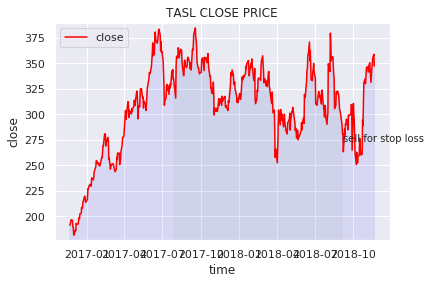

In [123]:
"""
表明卖出原因
"""
def plot_trade_with_annotate(buy_date, sell_date, annotate):
    """
    annotate 卖出原因
    """
    plot_trade(buy_date, sell_date)
    plt.annotate(annotate, xy=(sell_date, tsla_df['close'].asof(sell_date)), 
                arrowprops = dict(facecolor='yellow'),
                 horizontalalignment='left',
                 verticalalignment='top'
                )
plot_trade_with_annotate('2017-07-28', '2018-09-05', 'sell for stop loss')